In [58]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [5]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words = 10000)

17464789/17464789 [==============================] - 3s 0us/step


In [141]:
train_labels[1]

0

In [28]:
#decode a review
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [29]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [142]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension)) #this creates an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1 # sets specific indices of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data) # vectorized training data
x_test = vectorize_sequences(test_data) # vectorized test data
y_train = np.asarray(train_labels).astype('float32') # vectorized training data
y_test = np.asarray(test_labels).astype('float32') # vectorized test data



In [143]:
len(y_train)

25000

# Making the Neural Network

In [144]:
#The model Definition
from keras import models
from keras import layers


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [145]:
#Compiling the model
from keras import optimizers # allows you to configure parameters of optimizer, loss, and metrics
from keras import losses
from keras import metrics

model.compile(optimizer= optimizers.RMSprop(lr=0.001),
                loss = losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [146]:
# Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [147]:
partial_y_train

array([0., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [149]:
model.compile(optimizer='rmsprop',
             loss = 'binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train, 
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 55ms/step - loss: 0.1906 - acc: 0.9301 - val_loss: 0.2756 - val_acc: 0.8908
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1510 - acc: 0.9479 - val_loss: 0.2804 - val_acc: 0.8889
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1266 - acc: 0.9584 - val_loss: 0.2979 - val_acc: 0.8841
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1066 - acc: 0.9668 - val_loss: 0.3685 - val_acc: 0.8684
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0922 - acc: 0.9715 - val_loss: 0.3507 - val_acc: 0.8762
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0766 - acc: 0.9777 - val_loss: 0.3474 - val_acc: 0.8782
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0654 - acc: 0.9829 - val_loss: 0.3924 - val_acc: 0.8720
Epoch 8/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0533 - a

In [153]:
histort_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

<function matplotlib.pyplot.show(close=None, block=None)>

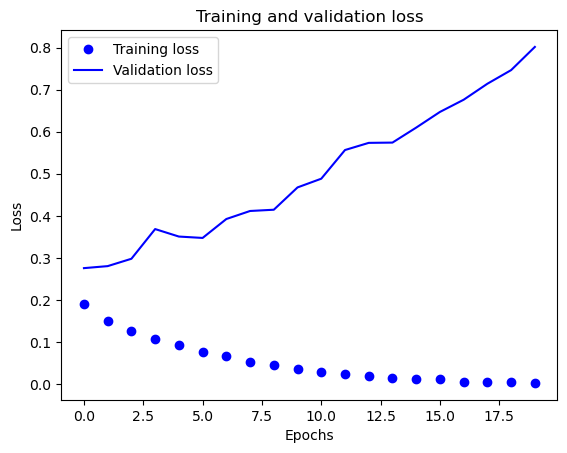

In [155]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(20)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

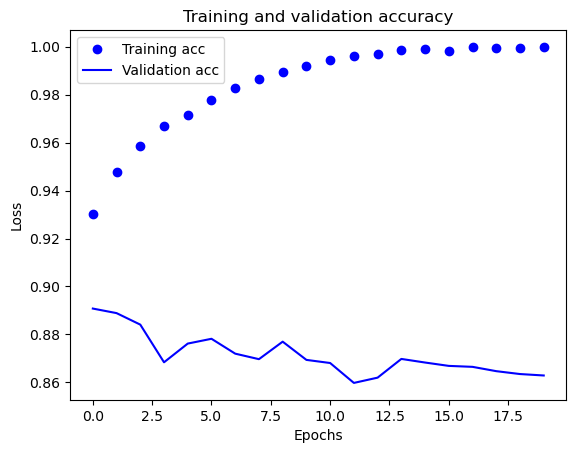

In [160]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

# Retraining the Model with 4 Epochs

In [161]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train,
          y_train,
          epochs = 4,
          batch_size = 512)

results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.5012 - accuracy: 0.7876
Epoch 2/4
49/49 [==============================] - 0s 6ms/step - loss: 0.2879 - accuracy: 0.9045
Epoch 3/4
49/49 [==============================] - 0s 6ms/step - loss: 0.2150 - accuracy: 0.9268
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2886 - accuracy: 0.8853


[0.2886424660682678, 0.8852800130844116]

In [ ]:
#Takeaways

# In a binary classification probelm, your network should end with a dense layer with one unit and a sigmoid 
# activation

# rmsprop optimizer is generally a good chouce, whatver your proba